## Process the input image

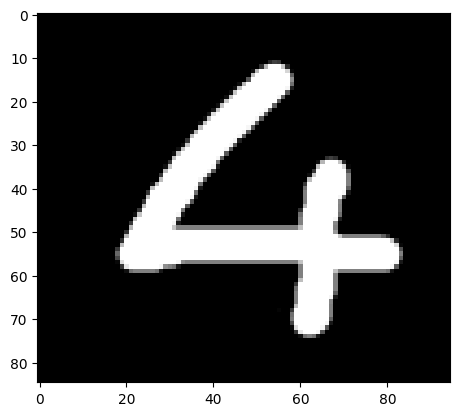

In [104]:
import base64
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

# Open the image, convert it to grayscale, and resize it
img = Image.open('./data/4.png')
data = np.array(img)
plt.imshow(data, cmap='gray')

In [105]:
from PIL import Image
import base64
import io

# Open the image file
img = Image.open('./data/9.png')

# Create a BytesIO object
buffered = io.BytesIO()

# Save the image as jpeg to the BytesIO object
img.save(buffered, format='png')

# Get the byte value of the BytesIO object
img_byte = buffered.getvalue()

# Encode the byte to base64
img_base64 = base64.b64encode(img_byte)

# If you want to decode to string for storing in json or db
img_base64_str = img_base64.decode()

print(f"img_base64_str: {img_base64_str}")

base64_image = img_base64_str

img_base64_str: iVBORw0KGgoAAAANSUhEUgAAALUAAADOCAIAAAD31NT8AAAHuElEQVR4nO3dIXTaWgCH8fveeefsuiHrVjemhqRubpsrjrlJpoYbVWwKiVynwHGmuqnNrVWkijpw1LEpcO0UT+Ssp4+Sf5ICyb15308WWu6y79zcBEj+Wi6XBojwd94DgNPoAwp9QKEPKPQBhT6g0AcU+oBCH1DoAwp9QKEPKPQBhT6g0AcU+oBCH1DoAwp9QKEPKPQBhT6g0AcU+oBCH1DoAwp9QKEPKPQBhT6g/JP3AHZiMpkEQXB5eXm/X9/f369UKpVKZZtj8lPR+ri4uDg6Ovr+/fvmf6parT5//vz2T/6P3SwLYTQa9Xq9Fy9eZLDFqtXqcDjM+1+cEe/7GI1G2WRxt5JerzcajWKH9+PHj9inOcvjPvIq424oa6eT+Xx+e3jVanU8Hme/lTbkZR8rm94FK9PJfD6vVqsrzymXy1dXV7luudT862PtpndHOE88e/Zs7aMnJyd5b790POtjNBq5HEeoVCpFPdRut/PehOl4c3y7WCxevXqV6sDVWttoNB4+fJj8V37//n18fLxYLFKP75YNf90pfvSxWCxevnwZBEHyX7HW9nq9er2e9rXevn17fHy88sNPnz79/Pkz7Z8qgrwnsESidud3WWubzWa3253NZlscwHw+73a7e3t7G25t9i/bFwTB6elp7NOste/evWs0Gpv/L95VKpWazebr16/7/f5isdjKbsgPeQcaI8nRirW23W5vd8KINZvNWq2WWIqu5d384XQfCeMYDAZ5jXA2m7Xb7eQzFn1sU+yyI984bgyHw4SJeNeHu5//iF12NBqN6XR6jyOUrQvPiW1lAesap/sQj4ZrDnf+P8IFbLfbzXsgW+ZuH1+/fo16KDy34U4cN4p3jsTRPsTO5d4nvjJQvCNeR/s4OjqKeqjZbLoZhzHm7Ows7yFsmYt96JXp48ePMxxLCgnP

## Define the endpoint name and auth key

In [106]:
endpoint_name = 'mnist-endpt-06151042538448'
key = 'FoA00MnhTamlBgDZIfwHxMhgHbnT1Ubd'

## Create and send the POST request to the endpoint

In [111]:
import requests
import json

# Set the endpoint URL
url = f"https://{endpoint_name}.westeurope.inference.ml.azure.com/score"
# Set the authentication key
headers = {'Authorization': f'Bearer {key}'}
# Create the data payload
data = {"data": base64_image}
# Send the POST request and get the response
print(json.dumps(data))
response = requests.post(url, headers=headers, data=json.dumps(data))
print(response.text)

{"data": "iVBORw0KGgoAAAANSUhEUgAAALUAAADOCAIAAAD31NT8AAAHuElEQVR4nO3dIXTaWgCH8fveeefsuiHrVjemhqRubpsrjrlJpoYbVWwKiVynwHGmuqnNrVWkijpw1LEpcO0UT+Ssp4+Sf5ICyb15308WWu6y79zcBEj+Wi6XBojwd94DgNPoAwp9QKEPKPQBhT6g0AcU+oBCH1DoAwp9QKEPKPQBhT6g0AcU+oBCH1DoAwp9QKEPKPQBhT6g0AcU+oBCH1DoAwp9QKEPKPQBhT6g/JP3AHZiMpkEQXB5eXm/X9/f369UKpVKZZtj8lPR+ri4uDg6Ovr+/fvmf6parT5//vz2T/6P3SwLYTQa9Xq9Fy9eZLDFqtXqcDjM+1+cEe/7GI1G2WRxt5JerzcajWKH9+PHj9inOcvjPvIq424oa6eT+Xx+e3jVanU8Hme/lTbkZR8rm94FK9PJfD6vVqsrzymXy1dXV7luudT862PtpndHOE88e/Zs7aMnJyd5b790POtjNBq5HEeoVCpFPdRut/PehOl4c3y7WCxevXqV6sDVWttoNB4+fJj8V37//n18fLxYLFKP75YNf90pfvSxWCxevnwZBEHyX7HW9nq9er2e9rXevn17fHy88sNPnz79/Pkz7Z8qgrwnsESidud3WWubzWa3253NZlscwHw+73a7e3t7G25t9i/bFwTB6elp7NOste/evWs0Gpv/L95VKpWazebr16/7/f5isdjKbsgPeQcaI8nRirW23W5vd8KINZvNWq2WWIqu5d384XQfCeMYDAZ5jXA2m7Xb7eQzFn1sU+yyI984bgyHw4SJeNeHu5//iF12NBqN6XR6jyOUrQvPiW1lAesap/sQj4ZrDnf+P8IFbLfbzXsgW+ZuH1+/fo16KDy34U4cN4p3jsTRPsTO5d4nvjJQvCNeR/s4OjqKeqjZbLoZhzHm7Ows7yFsmYt96JXp48ePMxxLCgnP4/nF0T

## Print the result of the prediction

In [108]:
# Get the prediction from the response
prediction = json.loads(response.content)
print("Predicted number is:", prediction)

Predicted number is: 8


## Challenge: Try the with a different image

In [115]:
import requests
import json
from PIL import Image
import base64
import io

# Open the image file
img = Image.open('./data/10-b.png')

# Create a BytesIO object
buffered = io.BytesIO()

# Save the image as jpeg to the BytesIO object
img.save(buffered, format='png')

# Get the byte value of the BytesIO object
img_byte = buffered.getvalue()

# Encode the byte to base64
img_base64 = base64.b64encode(img_byte)

# If you want to decode to string for storing in json or db
img_base64_str = img_base64.decode()

print(f"img_base64_str: {img_base64_str}")

base64_image = img_base64_str
# Set the endpoint URL
url = "http://20.8.54.190:80/predict/"
# Set the authentication key
#headers = {'Authorization': f'Bearer {key}'}
# Create the data payload
data = {"data": base64_image}
# Send the POST request and get the response
print(json.dumps(data))
response = requests.post(url, data=json.dumps(data))
print(response.text)
# Get the prediction from the response
prediction = json.loads(response.content)
print("Predicted number is:", prediction)

img_base64_str: iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAABKUUlEQVR4nMW9abAlyXXf9zuZVXW39/r1Mr2v07PPYBlwF0GRAIcQuIgAySBF0XTItMwIhyMcjrD9yfZHR9ghf/AHW3LYpmSFFApLomCRoBZzA0BSJEFiIQYggdmnZ+m9p5e33nurKjP9IZfKuu++190AaBXQ896rW7fy5MmT5/zPyXMy5Xc//c+c0pqiKBARAExrEAGlFTp8VpYlSikAtC4AqOs5xhistYgIIoJzjhOnTnP2iae59tabXLtyBWsNgkMp/36lFFVVISJY64iXMQbnHCLCdDplPp+jlKIsK4bDof/cWgaDAUVZIKI4cOgQKyurbG2us7O9Qz2fg1Igip3tbaxpqaoKYwxt26KVwlqLMQZVFBRFiVMKEYUuShAAB87x6quv8z/9z38Xa23qe36JCD/+1z7KX//4C7Rti1KBX7qg0IovfvlF/tv//u/s+t50OqVpmh7PIj/ipZRKf+c/nXO0bYuIMBqNMMbsev/i5ZxLP621vd+ttQyHw/u+A+Bz/+ZX03dEhLZt2dnZwTmH1prBYIhWmrZtKay16QOt/U1rvbBoq9FK7+qsc5a2bcOzvpH4mdYFBw8eot7aZGNjAxE/VkopBDCmRZAwdpYgaigtVFXJ9tY2O7MpSmmqwSB1ZDabMRwOGU0mjMYj2rbFWEdVDTCBXgFECaI1xlgI/coHxliLC3121mFMC06hdIF1BuWpAxw7O9u7Bnnx+re//TlA+LEf+SESL5UC0Xzf93wnWutdg++cSxPoYS/nHEVRJAF5kCsK5LdyiQiCUJUlSis2NzeZz+eUZYlzYJ2lrmu00vyn/9V/R+FwfcZlBMRZGgnznYmCZRIj48xTSnHw8GFWDx3h9q2bbG1tIc6itFDoAtO2OGNxGJr5PAiipig0hdaAA3FUgwFalzRtC6ZFHIyGQ9bW1nDOMZ/P

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [113]:
import requests

# The URL of the API
api_url = 'https://digit-predict-api.greenwave-60ab4ae3.westeurope.azurecontainerapps.io/'#'http://98.64.136.237:80/'
endpoint = 'predict_file/'
url = api_url + endpoint

# Load the image file
image_file = open('./data/4.png', 'rb')

# Create the payload
payload = {'image_file': image_file}

# Send the POST request
response = requests.post(url, files=payload)

# Print the response
print(response.json())

img_base64_str: iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAABKUUlEQVR4nMW9abAlyXXf9zuZVXW39/r1Mr2v07PPYBlwF0GRAIcQuIgAySBF0XTItMwIhyMcjrD9yfZHR9ghf/AHW3LYpmSFFApLomCRoBZzA0BSJEFiIQYggdmnZ+m9p5e33nurKjP9IZfKuu++190AaBXQ896rW7fy5MmT5/zPyXMy5Xc//c+c0pqiKBARAExrEAGlFTp8VpYlSikAtC4AqOs5xhistYgIIoJzjhOnTnP2iae59tabXLtyBWsNgkMp/36lFFVVISJY64iXMQbnHCLCdDplPp+jlKIsK4bDof/cWgaDAUVZIKI4cOgQKyurbG2us7O9Qz2fg1Igip3tbaxpqaoKYwxt26KVwlqLMQZVFBRFiVMKEYUuShAAB87x6quv8z/9z38Xa23qe36JCD/+1z7KX//4C7Rti1KBX7qg0IovfvlF/tv//u/s+t50OqVpmh7PIj/ipZRKf+c/nXO0bYuIMBqNMMbsev/i5ZxLP621vd+ttQyHw/u+A+Bz/+ZX03dEhLZt2dnZwTmH1prBYIhWmrZtKay16QOt/U1rvbBoq9FK7+qsc5a2bcOzvpH4mdYFBw8eot7aZGNjAxE/VkopBDCmRZAwdpYgaigtVFXJ9tY2O7MpSmmqwSB1ZDabMRwOGU0mjMYj2rbFWEdVDTCBXgFECaI1xlgI/coHxliLC3121mFMC06hdIF1BuWpAxw7O9u7Bnnx+re//TlA+LEf+SESL5UC0Xzf93wnWutdg++cSxPoYS/nHEVRJAF5kCsK5LdyiQiCUJUlSis2NzeZz+eUZYlzYJ2lrmu00vyn/9V/R+FwfcZlBMRZGgnznYmCZRIj48xTSnHw8GFWDx3h9q2bbG1tIc6itFDoAtO2OGNxGJr5PAiipig0hdaAA3FUgwFalzRtC6ZFHIyGQ9bW1nDOMZ/P